In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('autos_dataset.csv')
df.head() 

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.isnull().sum() 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [6]:
df['num-of-cylinders'].replace({'four' : 4, 'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},
                              inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
labelEnc = LabelEncoder()
labelEnc.fit_transform(df['num-of-cylinders'])

array([2, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 6, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2], dtype=int64)

In [9]:
df 

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio  horsepower  \
0            130         mpfi  3.47    2.68               9.0         111   
1            130         mpfi  3.47    2.68               9.0         111   
2            152         mpfi  2.68    3.47               9.0         154   
3            109         mpfi  3.19     3.4              10.0         102   
4            136         mpfi  3.19     3.4               8.0         115   
..           ...          ...   ...     ...               ...         ...   
200          141         mpfi  3.78    3.15               9.5         114   
201          141         mpfi  3.78    3.15               8.7         160   
202          173         mpfi  3.58    2.87               8.8         134   
203          145          idi  3.01     3.4              23.0         106   
204          141         mpfi  3.78    3.15               9.5         114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [10]:
df.replace('?', np.nan, inplace =  True)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio  horsepower  \
0            130         mpfi  3.47    2.68               9.0         111   
1            130         mpfi  3.47    2.68               9.0         111   
2            152         mpfi  2.68    3.47               9.0         154   
3            109         mpfi  3.19     3.4              10.0         102   
4            136         mpfi  3.19     3.4               8.0         115   
..           ...          ...   ...     ...               ...         ...   
200          141         mpfi  3.78    3.15               9.5         114   
201          141         mpfi  3.78    3.15               8.7         160   
202          173         mpfi  3.58    2.87               8.8         134   
203          145          idi  3.01     3.4              23.0         106   
204          141         mpfi  3.78    3.15               9.5         114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [12]:
df.drop(['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
         'engine-location','fuel-system'], axis = 1, inplace = True)

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-type        205 non-null    object 
 8   num-of-cylinders   205 non-null    int64  
 9   engine-size        205 non-null    int64  
 10  bore               201 non-null    object 
 11  stroke             201 non-null    object 
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [14]:
# converting object datatype into float datatype
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')
df['price'] = df['price'].astype('float')

In [15]:
df.drop(['engine-type'], axis = 1, inplace = True)

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    int64  
 8   engine-size        205 non-null    int64  
 9   bore               201 non-null    float64
 10  stroke             201 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         203 non-null    float64
 13  peak-rpm           203 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              201 non

In [17]:
df.isnull().sum() 

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
df.drop(['normalized-losses'], axis = 1, inplace =  True)

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(10), int64(6)
m

In [20]:
df.corr() 

symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
num-of-cylinders   -0.113129    0.339507  0.430672  0.545007 -0.013995   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
bore               -0.134205    0.490378  0.607480  0.559204  0.176195   
stroke             -0.008965    0.161477  0.129739  0.182956 -0.056999   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
horsepower          0.071622    0.352297  0.555003  0.642482 -0.110711   
peak-rpm            0.274573   -0.361052 -0.287325 -0.219957 -0.322272   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -0.107358   
price              -0.082391    0.584642  0.690628  0.751265  0.135486   

                   curb-weight  num-of-cylinders  engine-size      bore  \
symboling            -0.227691         -0.113129    -0.105790 -0.134205   
wheel-base            0.776386          0.339507     0.569329  0.490378   
length                0.877728          0.430672     0.683360  0.607480   
width                 0.867032          0.545007     0.735433  0.559204   
height                0.295572         -0.013995     0.067149  0.176195   
curb-weight           1.000000          0.609727     0.850594  0.649045   
num-of-cylinders      0.609727          1.000000     0.846031  0.243553   
engine-size           0.850594          0.846031     1.000000  0.594090   
bore                  0.649045          0.243553     0.594090  1.000000   
stroke                0.168929          0.008578     0.206675 -0.055909   
compression-ratio     0.151362         -0.020002     0.028971  0.005203   
horsepower            0.751034          0.691633     0.810773  0.577273   
peak-rpm             -0.266306         -0.124434    -0.244618 -0.264269   
city-mpg             -0.757414         -0.445837    -0.653658 -0.594584   
highway-mpg          -0.797465         -0.466666    -0.677470 -0.594572   
price                 0.834415          0.708645     0.872335  0.543436   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.008965          -0.178515    0.071622  0.274573   
wheel-base         0.161477           0.249786    0.352297 -0.361052   
length             0.129739           0.158414    0.555003 -0.287325   
width              0.182956           0.181129    0.642482 -0.219957   
height            -0.056999           0.261214   -0.110711 -0.322272   
curb-weight        0.168929           0.151362    0.751034 -0.266306   
num-of-cylinders   0.008578          -0.020002    0.691633 -0.124434   
engine-size        0.206675           0.028971    0.810773 -0.244618   
bore              -0.055909           0.005203    0.577273 -0.264269   
stroke             1.000000           0.186170    0.090254 -0.071493   
compression-ratio  0.186170           1.000000   -0.205874 -0.436221   
horsepower         0.090254          -0.205874    1.000000  0.130971   
peak-rpm          -0.071493          -0.436221    0.130971  1.000000   
city-mpg          -0.042906           0.324701   -0.803620 -0.113788   
highway-mpg       -0.044528           0.265201   -0.770908 -0.054257   
price              0.082310           0.071107    0.810533 -0.101649   

                   city-mpg  highway-mpg     price  
symboling         -0.035823     0.034606 -0.082391  
wheel-base        -0.470414    -0.544082  0.584642  
length            -0.670909    -0.704662  0.690628  
width             -0.642704    -0.677218  0.751

<AxesSubplot:>

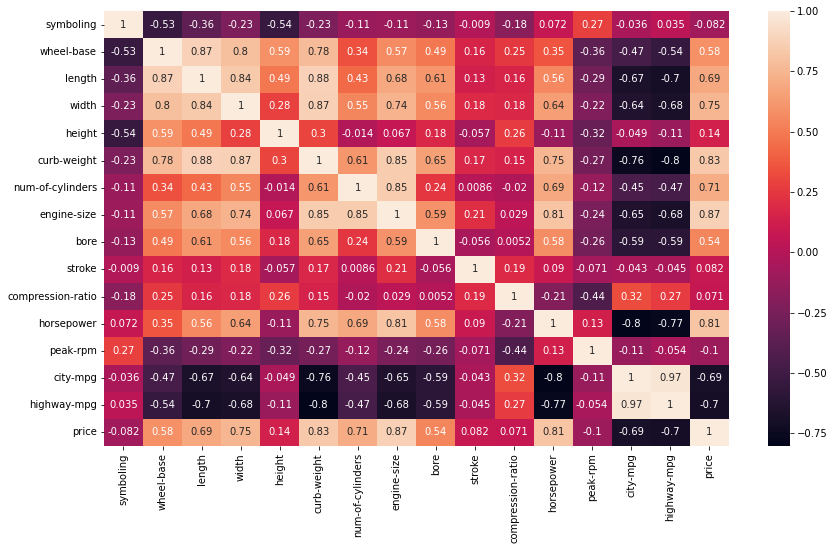

In [21]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True)

In [22]:
df.drop(['symboling','height','stroke','compression-ratio','peak-rpm'], axis = 1, inplace = True)

In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheel-base        205 non-null    float64
 1   length            205 non-null    float64
 2   width             205 non-null    float64
 3   curb-weight       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   engine-size       205 non-null    int64  
 6   bore              201 non-null    float64
 7   horsepower        203 non-null    float64
 8   city-mpg          205 non-null    int64  
 9   highway-mpg       205 non-null    int64  
 10  price             201 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


In [24]:
df['num-of-cylinders'].replace({'four' : 4, 'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},
                              inplace = True)

In [25]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheel-base        205 non-null    float64
 1   length            205 non-null    float64
 2   width             205 non-null    float64
 3   curb-weight       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   engine-size       205 non-null    int64  
 6   bore              201 non-null    float64
 7   horsepower        203 non-null    float64
 8   city-mpg          205 non-null    int64  
 9   highway-mpg       205 non-null    int64  
 10  price             201 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


In [26]:
df.isnull().sum() 

wheel-base          0
length              0
width               0
curb-weight         0
num-of-cylinders    0
engine-size         0
bore                4
horsepower          2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [27]:
df['bore'] = df['bore'].fillna(df['bore']. median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower']. median())
df['price'] = df['price'].fillna(df['price']. median())

In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheel-base        205 non-null    float64
 1   length            205 non-null    float64
 2   width             205 non-null    float64
 3   curb-weight       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   engine-size       205 non-null    int64  
 6   bore              205 non-null    float64
 7   horsepower        205 non-null    float64
 8   city-mpg          205 non-null    int64  
 9   highway-mpg       205 non-null    int64  
 10  price             205 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


# Train and Test Model

In [29]:
x = df.drop(['price'], axis =1)
y = df['price']

In [30]:
x

wheel-base  length  width  curb-weight  num-of-cylinders  engine-size  \
0          88.6   168.8   64.1         2548                 4          130   
1          88.6   168.8   64.1         2548                 4          130   
2          94.5   171.2   65.5         2823                 6          152   
3          99.8   176.6   66.2         2337                 4          109   
4          99.4   176.6   66.4         2824                 5          136   
..          ...     ...    ...          ...               ...          ...   
200       109.1   188.8   68.9         2952                 4          141   
201       109.1   188.8   68.8         3049                 4          141   
202       109.1   188.8   68.9         3012                 6          173   
203       109.1   188.8   68.9         3217                 6          145   
204       109.1   188.8   68.9         3062                 4          141   

     bore  horsepower  city-mpg  highway-mpg  
0    3.47       111.0        21           27  
1    3.47       111.0        21           27  
2    2.68       154.0        19           26  
3    3.19       102.0        24           30  
4    3.19       115.0        18           22  
..    ...         ...       ...          ...  
200  3.78       114.0        23           28  
201  3.78       160.0        19           25  
202  3.58       134.0        18           23  
203  3.01       106.0        26           27  
204  3.78       114.0        19           25  

[205 rows x 10 columns]

In [31]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

x_train.shape

(164, 10)

# Model Training

In [33]:
linear_model = DecisionTreeRegressor() 
linear_model.fit(x_train,y_train)

DecisionTreeRegressor()

# Evaluation of Testing Data

In [34]:
y_pred_test = linear_model.predict(x_test)
y_pred_test

array([ 7150.5,  7799. ,  7295. ,  6295. ,  8845. , 28248. ,  7499. ,
        6479. ,  7150.5,  8495. , 10295. , 11549. , 15985. ,  7895. ,
       12764. , 11549. , 11595. , 10295. , 18620. , 12945. ,  9720. ,
        6095. , 16430. ,  7957. , 11549. , 10295. , 14869. ,  7738. ,
        6229. ,  6692. ,  8238. ,  8949. , 30760. , 13295. , 16900. ,
        7738. ,  7957. , 35550. ,  9538. , 16845. ,  7799. ])

In [35]:
df_residual = pd.DataFrame()
df_residual['Residual'] = y_test  - y_pred_test

df_residual

Residual
78     -481.5
97      200.0
151    -957.0
44     4000.0
40     1450.0
67    -2696.0
98      750.0
18    -1328.0
152    -662.5
62     1750.0
4      7155.0
172    6120.0
197     530.0
38     1200.0
29      200.0
170    -350.0
190   -1615.0
33    -3766.0
136    -470.0
145   -1686.0
173    -772.0
31      760.0
11      495.0
119       0.0
169   -1560.0
34    -3166.0
84     -380.0
184     257.0
120       0.0
35      603.0
163    -180.0
28      -28.0
16    10555.0
130   -4000.0
116    1050.0
182      37.0
27      601.0
47    -3300.0
58     6107.0
204    5780.0
138   -2681.0

In [36]:
mse = mean_squared_error(y_test, y_pred_test)
mse

9144149.06097561

In [37]:
rmse = np.sqrt(mse)
rmse

3023.9294074061336

In [38]:
r2_score(y_test,y_pred_test)

0.833070481868887

# Evaluation of Training Model

In [39]:
linear_model = DecisionTreeRegressor() 
linear_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred_train=linear_model.predict(x_train) 
y_pred_train

array([18399. ,  7099. , 10198. ,  8195. ,  7799. , 40960. ,  6095. ,
       18150. , 13499. , 28176. , 11900. , 24565. ,  9258. ,  9720. ,
        6295. , 11248. ,  8845. , 13860. ,  8238. , 11395. , 10443. ,
       12764. , 15750. ,  7898. ,  6695. ,  7299. ,  9960. , 19699. ,
       11850. , 10345. , 36880. , 15250. ,  5348. , 18950. , 35550. ,
        9298. , 18344. , 17075. ,  7395. ,  7349. ,  7609. ,  5499. ,
       11549. ,  8921. , 20970. , 33278. , 14399. , 15985. ,  7788. ,
        8949. ,  8499. ,  9995. , 12940. , 21105. , 12629. , 15998. ,
        7975. , 10295. , 13200. ,  7295. ,  9538. , 13295. ,  7898. ,
       16900. ,  6918. , 21485. ,  5572. , 18420. , 16503. ,  5572. ,
        6649. ,  8495. , 16500. , 31600. ,  6989. ,  8778. , 17710. ,
        8449. , 14997.5,  7738. ,  6189. , 16695. , 18280. , 11395. ,
       16845. ,  9279. , 11595. , 11048. , 45400. ,  6849. ,  8013. ,
        9279. , 22470. , 16430. ,  5399. , 14869. ,  8358. ,  9549. ,
       22018. ,  795

In [41]:
mse = mean_squared_error(y_train, y_pred_train)
mse

51285.10365853659

In [42]:
rmse = np.sqrt(mse)
rmse

226.4621461934347

In [43]:
mean_absolute_error(y_train, y_pred_train)

54.76829268292683

In [44]:
r2_score(y_train,y_pred_train)

0.9991889603491718

In [45]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = linear_model, feature_names = df.columns,
                filled = True)

plt.savefig('DT.png')

# Hyperparameter Tunning

# GridSearchCV 

In [46]:
hyperparameters = {'criterion' :['mse','mae'],
                  'max_depth' : np.arange(2,10),         
                  'min_samples_split' : np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

linear_model = DecisionTreeRegressor()
gscv_dt_model = GridSearchCV(linear_model, hyperparameters, cv = 5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [49]:
gscv_dt_model.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [50]:
best_model = DecisionTreeRegressor(max_depth = 9,
                                    min_samples_leaf= 1,
                                    min_samples_split= 3)
best_model.fit(x_train,y_train)  

DecisionTreeRegressor(max_depth=9, min_samples_split=3)

# Testing Data Accuracy

In [53]:
y_pred_test = best_model.predict(x_test)
y_pred_test 

array([ 6997.66666667,  7704.        ,  7045.        ,  6387.        ,
        8672.        , 28212.        ,  7397.66666667,  6387.        ,
        6997.66666667,  8495.        , 11048.        , 11048.        ,
       14408.33333333,  7859.75      , 12696.5       , 11621.5       ,
       10446.5       , 10295.        , 18509.5       , 13950.        ,
        9720.        ,  6236.        , 15840.        ,  7859.75      ,
       11621.5       , 10295.        , 14869.        ,  7763.        ,
        6477.        ,  6997.66666667,  8808.        ,  8935.        ,
       32472.        , 13570.        , 16797.5       ,  7763.        ,
        7859.75      , 35775.        ,  9279.        , 16845.        ,
        7704.        ])

In [55]:
mse=mean_squared_error(y_pred_test,y_test)
mse 

8564950.794546071

In [57]:
mae=mean_absolute_error(y_pred_test,y_test)
mae 

1969.2052845528453

In [58]:
r2_Score=r2_score(y_pred_test,y_test)
r2_Score 

0.8055058787883627

# Training Data Accuracy

In [59]:
y_pred_train=best_model.predict(x_train)
y_pred_train 

array([18509.5       ,  6837.        , 10079.        ,  8136.        ,
        7704.        , 43180.        ,  6236.        , 18215.        ,
       13499.        , 28212.        , 14408.33333333, 24220.        ,
        8808.        ,  9720.        ,  6387.        , 11246.5       ,
        8672.        , 15467.5       ,  8136.        , 11395.        ,
       10443.        , 12696.5       , 15720.        ,  7859.75      ,
        6477.        ,  7397.66666667, 10079.        , 18449.        ,
       12010.        , 10170.        , 36880.        , 15840.        ,
        5368.5       , 18997.5       , 35775.        , 10446.5       ,
       18344.        , 15467.5       ,  7397.66666667,  7349.        ,
        7704.        ,  5347.        , 11621.5       ,  8935.        ,
       21037.5       , 33278.        , 14399.        , 14408.33333333,
        7763.        ,  8935.        ,  8672.        , 10170.        ,
       14408.33333333, 21037.5       , 12696.5       , 15998.        ,
      

In [60]:
mse=mean_squared_error(y_pred_train,y_train)
mse 

362849.77184959344

In [61]:
mae=mean_absolute_error(y_pred_train,y_train)
mae 

315.6493902439024

In [62]:
r2_Score=r2_score(y_pred_train,y_train)
r2_Score 

0.9942286559974257

# RandomizedSearchCV

In [63]:
hyperparameters = {'criterion' :['mse','mae'],
                  'max_depth' : np.arange(2,10),         
                  'min_samples_split' : np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)} 

linear_model = DecisionTreeRegressor()
rscv_dt_model = RandomizedSearchCV(linear_model, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [64]:
rscv_dt_model.best_params_ 

{'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_depth': 7,
 'criterion': 'mae'}

In [65]:
best_model = DecisionTreeRegressor(max_depth = 7,
                                    min_samples_leaf= 11,
                                    min_samples_split= 2)
best_model.fit(x_train,y_train) 

DecisionTreeRegressor(max_depth=7, min_samples_leaf=11)

# Testing Data Accuarcy

In [66]:
y_pred_test=best_model.predict(x_test)
y_pred_test

array([ 6199.90909091,  7423.27272727,  7423.27272727,  6772.13333333,
        8677.5       , 33112.86666667,  6772.13333333,  6199.90909091,
        6772.13333333, 10195.15384615, 12851.07692308, 12851.07692308,
       16057.85      ,  8296.5625    , 15722.23076923, 12851.07692308,
        8296.5625    ,  6199.90909091, 15722.23076923, 11627.15384615,
       10195.15384615,  6199.90909091, 11627.15384615,  8296.5625    ,
       12851.07692308,  6199.90909091, 15722.23076923,  7423.27272727,
        6199.90909091,  6199.90909091,  8296.5625    ,  8677.5       ,
       33112.86666667, 12851.07692308, 16057.85      ,  7423.27272727,
        8296.5625    , 33112.86666667, 11627.15384615, 16057.85      ,
        7423.27272727])

In [67]:
mse=mean_squared_error(y_pred_test,y_test)
mse 

8127159.972214027

In [68]:
mae=mean_absolute_error(y_pred_test,y_test)
mae 

1959.53552433339

In [69]:
r2_Score=r2_score(y_pred_test,y_test)
r2_Score 

0.8285613356869371

# Taining Data Accuracy

In [70]:
y_pred_train=best_model.predict(x_train)
y_pred_train 

array([15722.23076923,  6772.13333333,  8677.5       ,  8296.5625    ,
        7423.27272727, 33112.86666667,  6772.13333333, 16057.85      ,
       15722.23076923, 33112.86666667, 16057.85      , 19591.33333333,
        8296.5625    , 10195.15384615,  6772.13333333, 10195.15384615,
        8677.5       , 16057.85      ,  8296.5625    , 11627.15384615,
       10195.15384615, 15722.23076923, 19591.33333333,  8296.5625    ,
        6772.13333333,  6772.13333333,  8677.5       , 15722.23076923,
       12851.07692308, 10195.15384615, 33112.86666667, 11627.15384615,
        6772.13333333, 16057.85      , 33112.86666667,  8296.5625    ,
       16057.85      , 16057.85      ,  6772.13333333,  7423.27272727,
        7423.27272727,  6772.13333333, 12851.07692308,  8677.5       ,
       19591.33333333, 33112.86666667, 15722.23076923, 16057.85      ,
        7423.27272727,  8677.5       ,  8677.5       , 10195.15384615,
       16057.85      , 19591.33333333, 15722.23076923, 19591.33333333,
      

In [71]:
mse=mean_squared_error(y_pred_train,y_train)
mse 

8446642.873945896

In [72]:
mae=mean_absolute_error(y_pred_train,y_train)
mae 

1724.744997939053

In [73]:
r2_Score=r2_score(y_pred_train,y_train)
r2_Score 

0.8458279960650598

# Pruning

In [74]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [75]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 2.74390244e-02, 2.74390244e-02, 2.39024390e+00,
       4.87804878e+00, 5.12500000e+00, 7.62195122e+00, 1.09756098e+01,
       1.48790650e+01, 1.58048780e+01, 1.58048780e+01, 2.75152439e+01,
       2.80975610e+01, 2.86859756e+01, 3.04878049e+01, 5.15243902e+01,
       5.55640244e+01, 5.55640244e+01, 5.97560976e+01, 6.41006098e+01,
       7.40853659e+01, 9.12469512e+01, 9.39186992e+01, 1.03219512e+02,
       1.10060976e+02, 1.21359756e+02, 1.21951220e+02, 1.26878049e+02,
       1.28125000e+02, 1.48905488e+02, 1.67548780e+02, 1.68342480e+02,
       1.72695122e+02, 2.05792683e+02, 2.37037093e+02, 2.38065041e+02,
       2.42451220e+02, 2.72686992e+02, 2.81756098e+02, 3.04878049e+02,
       3.12195122e+02, 3.12195122e+02, 3.14162602e+02, 3.18699187e+02,
       3.64987805e+02, 3.73475610e+02, 5.12296748e+02, 5.89394817e+02,
       6.17378049e+02, 6.33000073e+02, 6.73475610e+02, 6.87881098e+02,
       8.14049797e+02, 8.37121951e+02, 8.54561992e+02, 9.22256098e+02,
      

In [76]:
train_accuracy = []
test_accuracy = []

for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeRegressor(ccp_alpha = ccp_alpha, random_state = 1)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [77]:
max(test_accuracy)

0.8664792793407983

In [78]:
test_accuracy.index(max(test_accuracy))

133

In [81]:
train_accuracy[133]

0.9537177112698817

In [83]:
ccp_alphas[133] 

245388.21255807613

# Putting ccp_alphas in model fitting

In [84]:
dt_model = DecisionTreeRegressor(ccp_alpha=245388.21255807613)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=245388.21255807613)

# Testing Data Accuarcy

In [85]:
y_pred_test=dt_model.predict(x_test)
y_pred_test 

array([ 7248.71698113,  7248.71698113,  7248.71698113,  7248.71698113,
        9466.68      , 29341.33333333,  7248.71698113,  7248.71698113,
        7248.71698113,  9466.68      , 13302.1       , 13302.1       ,
       16057.85      ,  7248.71698113, 13302.1       , 13302.1       ,
        7248.71698113,  7248.71698113, 13302.1       , 13572.85714286,
        9466.68      ,  7248.71698113, 13572.85714286,  7248.71698113,
       13302.1       ,  7248.71698113, 13302.1       ,  7248.71698113,
        7248.71698113,  7248.71698113,  7248.71698113,  9466.68      ,
       34668.22222222, 13302.1       , 16057.85      ,  7248.71698113,
        7248.71698113, 34668.22222222,  9357.16666667, 16057.85      ,
        7248.71698113])

In [87]:
mse=mean_squared_error(y_pred_test,y_test)
mse  

7314065.158192441

In [88]:
mae=mean_absolute_error(y_pred_test,y_test)
mae 

2023.3947001073786

In [89]:
r2_Score=r2_score(y_pred_test,y_test)
r2_Score 

0.8397503589587002

# Training Data Accuracy

In [91]:
y_pred_train=dt_model.predict(x_train)
y_pred_train 

array([13302.1       ,  7248.71698113,  9466.68      ,  7248.71698113,
        7248.71698113, 43180.        ,  7248.71698113, 16057.85      ,
       13302.1       , 29341.33333333, 16057.85      , 21387.5       ,
        7248.71698113,  9466.68      ,  7248.71698113,  9466.68      ,
        9466.68      , 16057.85      ,  7248.71698113, 13572.85714286,
        9466.68      , 13302.1       , 15999.        ,  7248.71698113,
        7248.71698113,  7248.71698113,  9466.68      , 17568.5       ,
       13302.1       ,  9466.68      , 34668.22222222, 13572.85714286,
        7248.71698113, 16057.85      , 34668.22222222,  7248.71698113,
       16057.85      , 16057.85      ,  7248.71698113,  7248.71698113,
        7248.71698113,  7248.71698113, 13302.1       ,  9466.68      ,
       21387.5       , 34668.22222222, 13302.1       , 16057.85      ,
        7248.71698113,  9466.68      ,  9466.68      ,  9466.68      ,
       16057.85      , 21387.5       , 13302.1       , 15999.        ,
      

In [92]:
mse=mean_squared_error(y_pred_train,y_train)
mse 

2926604.109496435

In [93]:
mae=mean_absolute_error(y_pred_train,y_train)
mae 

1276.9225426044015

In [94]:
r2_Score=r2_score(y_pred_train,y_train)
r2_Score

0.9514717109861648

# To Get to know about training and testing data accuaracy

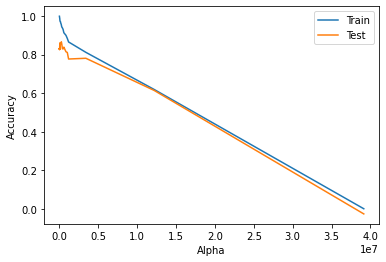

In [95]:
fig,ax = plt.subplots()

ax.plot(ccp_alphas,train_accuracy, label = 'Train' )
ax.plot(ccp_alphas,test_accuracy, label = 'Test' )
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()

# Decision Tree plot

In [96]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = dt_model, feature_names = df.columns,
                filled = True)
plt.savefig('DT_auto_dataset_CCP.png')